In [54]:
import pandas as pd
from utils import get_biomass_summary

summary_feuillus = get_biomass_summary(df_feuillus)['biomass']
summary_resineux = get_biomass_summary(df_resineux)['biomass']

biomass_comparison = pd.DataFrame(
    {
        "feuillus": summary_feuillus,
        "resineux": summary_resineux,
    }
)

biomass_comparison


,feuillus,resineux
mean,262.034481,175.431344
median,171.666387,179.499689
sum,6288.827549,6490.959727
count,24.000000,37.000000


In [55]:
# Compute scaling factor based on individual counts
count_feuillus = summary_feuillus["count"]
count_resineux = summary_resineux["count"]

scaling_factor_resineux = count_feuillus / count_resineux

normalized_sum_resineux = summary_resineux["sum"] * scaling_factor_resineux

normalized_sums = pd.Series(
    {
        "feuillus": summary_feuillus["sum"],
        "resineux": normalized_sum_resineux,
        "resineux non-normalisée": summary_resineux["sum"],
    },
    name="normalized_sum",
)

biomass_comparison_normalized = biomass_comparison.copy()
biomass_comparison_normalized.loc["sum", "resineux"] = normalized_sum_resineux

normalized_sums

feuillus                   6288.827549
resineux                   4210.352255
resineux non-normalisée    6490.959727
Name: normalized_sum, dtype: float64

In [56]:
from utils import get_biomass_summary_by_species

df_all = pd.concat([df_resineux, df_feuillus])

get_biomass_summary_by_species(df_all)

,mean,median,sum,count
species,,,,
bouleau_blanc,158.020709,136.868171,3160.414181,20
épinette_noire,201.644486,198.274055,5646.045600,28
érable_rouge,305.640577,191.575919,3973.327495,13


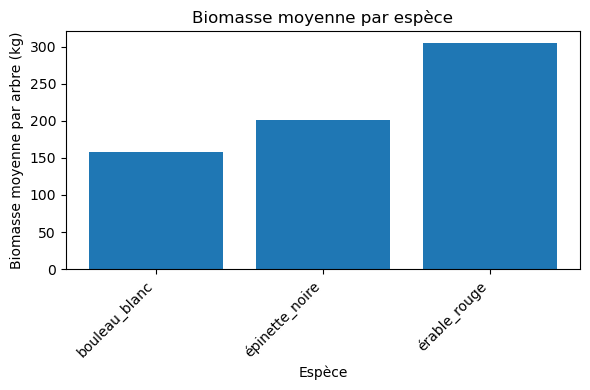

In [57]:
mean_biomass_by_species = get_biomass_summary_by_species(df_all)[["mean"]]

plt.figure(figsize=(6, 4))
plt.bar(mean_biomass_by_species.index, mean_biomass_by_species["mean"])
plt.ylabel("Biomasse moyenne par arbre (kg)")
plt.xlabel("Espèce")
plt.title("Biomasse moyenne par espèce")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



### 1. Portrait du Stock de Carbone: parcelle Feuillus vs Résineux

Comparaison brute et non normalisé de la biomasse totale (sum) par parcelle révèle que les parcelles de feuillus et résineux semblent équivalentes en terme de stock de carbone, avec une variation de seulement -3.11%.

|     |   feuillus |   resineux |   variation |   variation % |
|:----|-----------:|-----------:|------------:|--------------:|
| sum |    6288.83 |    6490.96 |    -202.132 |      -3.11406 |

Cependant, une analyse plus approfondie révèle un portrait différent: les feuillus, en particulier les érables rouge, sont plus large et stockent une biomasse beaucoup plus importante par individu, suggérant une production plus mature ou plus productive.

Voici une analyse des éléments de preuve qui étayent cette conclusion:

### 2. Le stock total vs individuel: La densité

- La somme de la biomasse des résineux (sum = 6490.959727180452) démontre une légère élévation en comparaison avec la biomasse des feuillus (sum = 6288.827548586673).
- Le contexte critique: cette différence est entièrement expliqué par le dénombrement des individus plus élevé chez les resineux (37.0) en comparaison avec les feuillus (24.0).

**L'utilisation de la moyenne de la biomasse par arbre révèle une tendance beaucoup plus évocatrice:**

|      |   feuillus |   resineux |   variation |   variation % |
|:-----|-----------:|-----------:|------------:|--------------:|
| mean |    262.034 |    175.431 |     86.6031 |         49.37 |

Avec cette nouvelle information, nous pouvons conclure que les individus de la **parcelle feuillus (en majorité composé d'érable rouges et de bouleaux blancs) stockent une biomasse beaucoup plus importante, a savoir 49.37 % de plus** que la parcelle des résineux

### 3. La comparaison normalisée confirme la supériorité des feuillus

La figure "Biomasse totale avec résineux remis à l'échelle" addresse directement cette problématique quant au dénombrement. En normalisant le compte des résineux pour qu'ils coincident avec celui des feuillus (24.0), il est possible de répondre a la question suivante : "si les deux parcelles dénombraient la même quantité d'arbres, laquelle stockerait davantage de carbone ?"



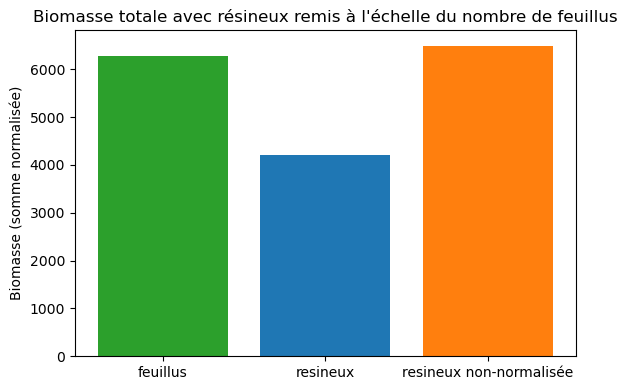



Le résultat est sans equivoque, la parcelle des feuilleus stockerait beaucoup plus de carbone (environ 6289.0 kg) contre (environ 4210.0 kg) pour les resineux



feuillus                   6288.827549
resineux                   4210.352255
resineux non-normalisée    6490.959727
Name: normalized_sum, dtype: float64

In [58]:
from IPython.display import display, Markdown

summary_feuillus : Series = get_biomass_summary(df_feuillus)['biomass']
summary_resineux : Series = get_biomass_summary(df_resineux)['biomass']

feuillus_biomass = summary_feuillus[["sum"]]
resineux_biomass = summary_resineux[["sum"]]
variation_percentage = (summary_feuillus["sum"] - summary_resineux["sum"] )/ summary_resineux["sum"] * 100

biomass_comparison = pd.DataFrame(
    {
        "feuillus": feuillus_biomass,
        "resineux": resineux_biomass,
        "variation": summary_feuillus["sum"] - summary_resineux["sum"],
        "variation %": variation_percentage,
    }
)

b_mean_variation = summary_feuillus["mean"] - summary_resineux["mean"]
b_mean_variation_percent = round(b_mean_variation / summary_resineux["mean"] * 100, 2)

biomass_mean_comparison = pd.DataFrame(
    {
        "feuillus": summary_feuillus[["mean"]],
        "resineux": summary_resineux[["mean"]],
        "variation": b_mean_variation,
        "variation %": b_mean_variation_percent,
    }
)



# language=Markdown
report_text = f"""
### 1. Portrait du Stock de Carbone: parcelle Feuillus vs Résineux

Comparaison brute et non normalisé de la biomasse totale (sum) par parcelle révèle que les parcelles de feuillus et résineux semblent équivalentes en terme de stock de carbone, avec une variation de seulement {round(variation_percentage, 2)}%.

{biomass_comparison.to_markdown()}

Cependant, une analyse plus approfondie révèle un portrait différent: les feuillus, en particulier les érables rouge, sont plus large et stockent une biomasse beaucoup plus importante par individu, suggérant une production plus mature ou plus productive.

Voici une analyse des éléments de preuve qui étayent cette conclusion:

### 2. Le stock total vs individuel: La densité

- La somme de la biomasse des résineux (sum = {summary_resineux["sum"]}) démontre une légère élévation en comparaison avec la biomasse des feuillus (sum = {summary_feuillus["sum"]}).
- Le contexte critique: cette différence est entièrement expliqué par le dénombrement des individus plus élevé chez les resineux ({summary_resineux["count"]}) en comparaison avec les feuillus ({summary_feuillus["count"]}).

**L'utilisation de la moyenne de la biomasse par arbre révèle une tendance beaucoup plus évocatrice:**

{biomass_mean_comparison.to_markdown()}

Avec cette nouvelle information, nous pouvons conclure que les individus de la **parcelle feuillus (en majorité composé d'érable rouges et de bouleaux blancs) stockent une biomasse beaucoup plus importante, a savoir {b_mean_variation_percent} % de plus** que la parcelle des résineux

### 3. La comparaison normalisée confirme la supériorité des feuillus

La figure "Biomasse totale avec résineux remis à l'échelle" addresse directement cette problématique quant au dénombrement. En normalisant le compte des résineux pour qu'ils coincident avec celui des feuillus ({summary_feuillus["count"]}), il est possible de répondre a la question suivante : "si les deux parcelles dénombraient la même quantité d'arbres, laquelle stockerait davantage de carbone ?"

"""
display(Markdown(report_text))

plt.figure(figsize=(6, 4))
plt.bar(normalized_sums.index, normalized_sums.values, color=["tab:green", "tab:blue", "tab:orange"])
plt.ylabel("Biomasse (somme normalisée)")
plt.title("Biomasse totale avec résineux remis à l'échelle du nombre de feuillus")
plt.tight_layout()
plt.show()

# language=Markdown
report_text = f"""

Le résultat est sans equivoque, la parcelle des feuilleus stockerait beaucoup plus de carbone (environ {round(normalized_sums["feuillus"], 0)} kg) contre (environ {round(normalized_sums["resineux"], 0)} kg) pour les resineux

"""
# language=python
display(Markdown(report_text))

normalized_sums



### 4. Difference dans la nature de la distribution: Geants vs. foule uniforme


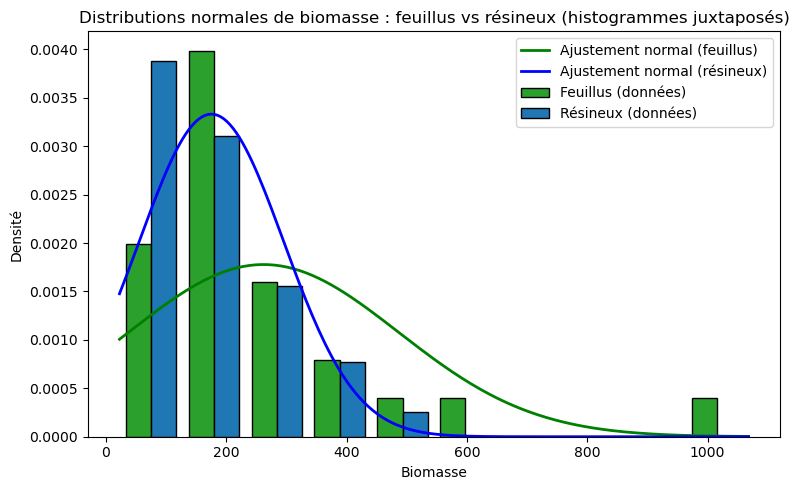




Cet histogramme illustre clairement pourquoi les tendances et moyennes sont si différentes.

- **Parcelle Feuillus** : La distribution de la biomasse est grande et tend **vers la droite**. Nous pouvons observer ceci car la moyenne (262.0344811911114 kg) est beaucoup plus grande que la médiane (171.66638708521128 kg). Cet histogramme montre clairement que la plupart des arbres sont dans les 100-200 kg, mais que seulement quelques arbres massifs, incluant un de plus de 1000 kg. Ces géants augmentent la moyenne de manière significative.
- **Parcelle résineux** : La distribution de la biomasse est beaucoup plus étroite et symétrique. La moyenne (175.43134397785008 kg) and la médiane (179.49968858531338 kg) sont très rapprochés. Cet histogramme montre une tendance claire vers le centre sauf quelques cas isolés. Ces résineux sont beaucoup plus uniforme en terme de grandeur et diamètre.

Tableau de la representation des statistisques:

TODO: METTRE TAB



In [59]:
import numpy as np
from scipy.stats import norm
# language=Markdown
report_text = f"""

### 4. Difference dans la nature de la distribution: Geants vs. foule uniforme
"""

# language=python
display(Markdown(report_text))


biomass_feuillus_values = df_feuillus["biomass"]
biomass_resineux_values = df_resineux["biomass"]


x_min = min(biomass_feuillus_values.min(), biomass_resineux_values.min())
x_max = max(biomass_feuillus_values.max(), biomass_resineux_values.max())
x = np.linspace(x_min, x_max, 200)

# Compute common bin edges for both datasets
all_values = np.concatenate([biomass_feuillus_values.values, biomass_resineux_values.values])
bins = np.histogram_bin_edges(all_values, bins=10)

# Compute histogram densities
feuillus_hist, _ = np.histogram(biomass_feuillus_values, bins=bins, density=True)
resineux_hist, _ = np.histogram(biomass_resineux_values, bins=bins, density=True)

# Compute bar positions (side by side)
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_width = (bins[1] - bins[0]) * 0.4  # each bar narrower than bin, placed side by side

plt.figure(figsize=(8, 5))
plt.bar(
    bin_centers - bin_width / 2,
    feuillus_hist,
    width=bin_width,
    color="tab:green",
    edgecolor="black",
    label="Feuillus (données)",
)
plt.bar(
    bin_centers + bin_width / 2,
    resineux_hist,
    width=bin_width,
    color="tab:blue",
    edgecolor="black",
    label="Résineux (données)",
)

feuillus_mean = biomass_feuillus_values.mean()
feuillus_median = biomass_feuillus_values.median()
feuillus_std = biomass_feuillus_values.std()
resineux_mean = biomass_resineux_values.mean()
resineux_median = biomass_resineux_values.median()
resineux_std = biomass_resineux_values.std()

plt.plot(
    x,
    norm.pdf(x, feuillus_mean, feuillus_std),
    color="green",
    linewidth=2,
    label="Ajustement normal (feuillus)",
)
plt.plot(
    x,
    norm.pdf(x, resineux_mean, resineux_std),
    color="blue",
    linewidth=2,
    label="Ajustement normal (résineux)",
)

plt.xlabel("Biomasse")
plt.ylabel("Densité")
plt.title("Distributions normales de biomasse : feuillus vs résineux (histogrammes juxtaposés)")
plt.legend()
plt.tight_layout()
plt.show()

# language=Markdown
report_text = f"""


Cet histogramme illustre clairement pourquoi les tendances et moyennes sont si différentes.

- **Parcelle Feuillus** : La distribution de la biomasse est grande et tend **vers la droite**. Nous pouvons observer ceci car la moyenne ({feuillus_mean} kg) est beaucoup plus grande que la médiane ({feuillus_median} kg). Cet histogramme montre clairement que la plupart des arbres sont dans les 100-200 kg, mais que seulement quelques arbres massifs, incluant un de plus de 1000 kg. Ces géants augmentent la moyenne de manière significative.
- **Parcelle résineux** : La distribution de la biomasse est beaucoup plus étroite et symétrique. La moyenne ({resineux_mean} kg) and la médiane ({resineux_median} kg) sont très rapprochés. Cet histogramme montre une tendance claire vers le centre sauf quelques cas isolés. Ces résineux sont beaucoup plus uniforme en terme de grandeur et diamètre.

Tableau de la representation des statistisques:

TODO: METTRE TAB

"""

# language=python
display(Markdown(report_text))



### 5. La cause: la difference dans la grandeur des arbres (DHB et hauteur)


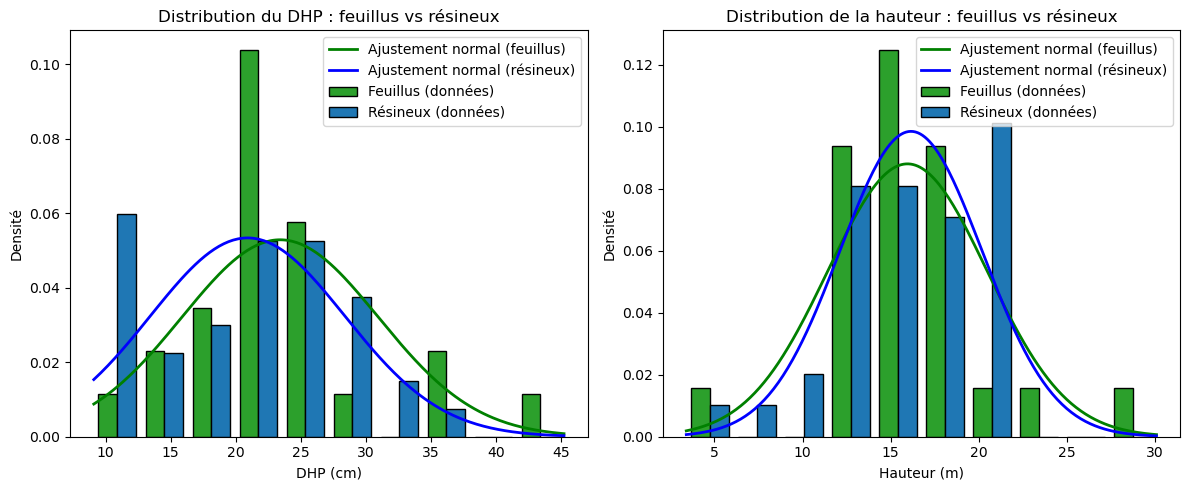



Cet histogramme pour le DHP et la hauteur explique ce pattern de biomasse:
- Feuillus: Montre une grande diversité de grandeur. le graphique montre des arbres de 12.5 cm jusqu'a 45.2 cm DHP. des hauteur de 5.8 m jusqu'a  30.1 m. Ceci montre une grande diversité de plusieurs arbres de plusieurs niveau de maturité. Incluant certain très vieux et large.
- Résineux : Les distributions sont beaucoup plus uniformes et aggrégés, avec des DHP beaucoup plus bas et aplatis en terme de distribution allant de 9.1 cm a 36.0 cm et une distribution des hauteurs beaucoup plus étroite et uniforme de 3.4 m a 21.7 m. Ils sont beaucoup plus uniforme en grandeurs et caractéristiques, montrant des ages et croissances plus rapprochés.



In [60]:

import numpy as np
from scipy.stats import norm

# Distributions juxtaposées de DPH et de hauteur : feuillus vs résineux

# --- DPH ---
dph_feuillus_values = df_feuillus["dph"]
dph_resineux_values = df_resineux["dph"]

dph_min = min(dph_feuillus_values.min(), dph_resineux_values.min())
dph_max = max(dph_feuillus_values.max(), dph_resineux_values.max())
x_dph = np.linspace(dph_min, dph_max, 200)

# Bins communs pour DPH
all_dph_values = np.concatenate([dph_feuillus_values.values, dph_resineux_values.values])
bins_dph = np.histogram_bin_edges(all_dph_values, bins=10)

# Histogrammes densités DPH
feuillus_dph_hist, _ = np.histogram(dph_feuillus_values, bins=bins_dph, density=True)
resineux_dph_hist, _ = np.histogram(dph_resineux_values, bins=bins_dph, density=True)

bin_centers_dph = (bins_dph[:-1] + bins_dph[1:]) / 2
bin_width_dph = (bins_dph[1] - bins_dph[0]) * 0.4

# Stats DPH
feuillus_dph_mean = dph_feuillus_values.mean()
feuillus_dph_std = dph_feuillus_values.std()
resineux_dph_mean = dph_resineux_values.mean()
resineux_dph_std = dph_resineux_values.std()

# --- Hauteur ---
h_feuillus_values = df_feuillus["height"]
h_resineux_values = df_resineux["height"]



h_min = min(h_feuillus_values.min(), h_resineux_values.min())
h_max = max(h_feuillus_values.max(), h_resineux_values.max())
x_h = np.linspace(h_min, h_max, 200)

# Bins communs pour hauteur
all_h_values = np.concatenate([h_feuillus_values.values, h_resineux_values.values])
bins_h = np.histogram_bin_edges(all_h_values, bins=10)

# Histogrammes densités hauteur
feuillus_h_hist, _ = np.histogram(h_feuillus_values, bins=bins_h, density=True)
resineux_h_hist, _ = np.histogram(h_resineux_values, bins=bins_h, density=True)

bin_centers_h = (bins_h[:-1] + bins_h[1:]) / 2
bin_width_h = (bins_h[1] - bins_h[0]) * 0.4

# Stats hauteur
feuillus_h_mean = h_feuillus_values.mean()
feuillus_h_std = h_feuillus_values.std()
resineux_h_mean = h_resineux_values.mean()
resineux_h_std = h_resineux_values.std()

# --- Figure avec deux sous-graphiques : DPH et hauteur ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Sous-graphe DPH
axes[0].bar(
    bin_centers_dph - bin_width_dph / 2,
    feuillus_dph_hist,
    width=bin_width_dph,
    color="tab:green",
    edgecolor="black",
    label="Feuillus (données)",
)
axes[0].bar(
    bin_centers_dph + bin_width_dph / 2,
    resineux_dph_hist,
    width=bin_width_dph,
    color="tab:blue",
    edgecolor="black",
    label="Résineux (données)",
)

axes[0].plot(
    x_dph,
    norm.pdf(x_dph, feuillus_dph_mean, feuillus_dph_std),
    color="green",
    linewidth=2,
    label="Ajustement normal (feuillus)",
)
axes[0].plot(
    x_dph,
    norm.pdf(x_dph, resineux_dph_mean, resineux_dph_std),
    color="blue",
    linewidth=2,
    label="Ajustement normal (résineux)",
)

axes[0].set_xlabel("DHP (cm)")
axes[0].set_ylabel("Densité")
axes[0].set_title("Distribution du DHP : feuillus vs résineux")
axes[0].legend()

# Sous-graphe Hauteur
axes[1].bar(
    bin_centers_h - bin_width_h / 2,
    feuillus_h_hist,
    width=bin_width_h,
    color="tab:green",
    edgecolor="black",
    label="Feuillus (données)",
)
axes[1].bar(
    bin_centers_h + bin_width_h / 2,
    resineux_h_hist,
    width=bin_width_h,
    color="tab:blue",
    edgecolor="black",
    label="Résineux (données)",
)

axes[1].plot(
    x_h,
    norm.pdf(x_h, feuillus_h_mean, feuillus_h_std),
    color="green",
    linewidth=2,
    label="Ajustement normal (feuillus)",
)
axes[1].plot(
    x_h,
    norm.pdf(x_h, resineux_h_mean, resineux_h_std),
    color="blue",
    linewidth=2,
    label="Ajustement normal (résineux)",
)

axes[1].set_xlabel("Hauteur (m)")
axes[1].set_ylabel("Densité")
axes[1].set_title("Distribution de la hauteur : feuillus vs résineux")
axes[1].legend()

plt.tight_layout()


# language=Markdown
report_text = f"""
### 5. La cause: la difference dans la grandeur des arbres (DHB et hauteur)
"""
display(Markdown(report_text))

plt.show()

# language=Markdown
report_text = f"""

Cet histogramme pour le DHP et la hauteur explique ce pattern de biomasse:
- Feuillus: Montre une grande diversité de grandeur. le graphique montre des arbres de {dph_feuillus_values.min()} cm jusqu'a {dph_feuillus_values.max()} cm DHP. des hauteur de {h_feuillus_values.min()} m jusqu'a  {h_feuillus_values.max()} m. Ceci montre une grande diversité de plusieurs arbres de plusieurs niveau de maturité. Incluant certain très vieux et large.
- Résineux : Les distributions sont beaucoup plus uniformes et aggrégés, avec des DHP beaucoup plus bas et aplatis en terme de distribution allant de {dph_resineux_values.min()} cm a {dph_resineux_values.max()} cm et une distribution des hauteurs beaucoup plus étroite et uniforme de {h_resineux_values.min()} m a {h_resineux_values.max()} m. Ils sont beaucoup plus uniforme en grandeurs et caractéristiques, montrant des ages et croissances plus rapprochés.

"""
display(Markdown(report_text))


In [61]:
# language=Markdown
erable_mean = round(mean_biomass_by_species.loc["érable_rouge", "mean"])
bouleau_mean = round(mean_biomass_by_species.loc["bouleau_blanc", "mean"])
epinette_mean = round(mean_biomass_by_species.loc["épinette_noire", "mean"])

report_text = f"""
### 6. Contribution propre à l'espèce

Pour mieux comprendre quels arbres soutiennent le stock de carbone observé dans l'ensemble des deux parcelles, on peut examiner la biomasse moyenne par individu pour chaque espèce, en combinant les feuillus et les résineux.

Voici le tableau de la biomasse moyenne par espèce (tous individus confondus) :

{mean_biomass_by_species.to_markdown()}

**Interprétation par espèce :**

- **Érable rouge** : Avec une biomasse moyenne d’environ **{erable_mean} kg par arbre**, l’érable rouge est l’espèce qui contribue le plus fortement au stock de carbone. Quelques individus très massifs tirent la moyenne vers le haut et expliquent une grande partie de la supériorité de la parcelle feuillue.
- **Bouleau blanc** : Le bouleau blanc présente une biomasse moyenne d’environ **{bouleau_mean} kg par arbre**. Il contribue de façon importante mais secondaire au stock total, en particulier grâce à son abondance dans la parcelle feuillue.
- **Épinette noire** : Avec une biomasse moyenne d’environ **{epinette_mean} kg par arbre**, l’épinette noire domine numériquement la parcelle résineuse mais chaque individu stocke moins de carbone qu’un érable rouge, ce qui est cohérent avec la biomasse moyenne plus faible observée pour la parcelle résineuse.

En résumé, la structure du stock de carbone à l’échelle des deux parcelles est largement portée par les **érables rouges**, renforcée par les **bouleaux blancs**, alors que les **épinettes noires** jouent surtout un rôle de masse par leur grand nombre plutôt que par leur biomasse individuelle.
"""
display(Markdown(report_text))



### 6. Contribution propre à l'espèce

Pour mieux comprendre quels arbres soutiennent le stock de carbone observé dans l'ensemble des deux parcelles, on peut examiner la biomasse moyenne par individu pour chaque espèce, en combinant les feuillus et les résineux.

Voici le tableau de la biomasse moyenne par espèce (tous individus confondus) :

| species        |    mean |
|:---------------|--------:|
| bouleau_blanc  | 158.021 |
| épinette_noire | 201.644 |
| érable_rouge   | 305.641 |

**Interprétation par espèce :**

- **Érable rouge** : Avec une biomasse moyenne d’environ **306 kg par arbre**, l’érable rouge est l’espèce qui contribue le plus fortement au stock de carbone. Quelques individus très massifs tirent la moyenne vers le haut et expliquent une grande partie de la supériorité de la parcelle feuillue.
- **Bouleau blanc** : Le bouleau blanc présente une biomasse moyenne d’environ **158 kg par arbre**. Il contribue de façon importante mais secondaire au stock total, en particulier grâce à son abondance dans la parcelle feuillue.
- **Épinette noire** : Avec une biomasse moyenne d’environ **202 kg par arbre**, l’épinette noire domine numériquement la parcelle résineuse mais chaque individu stocke moins de carbone qu’un érable rouge, ce qui est cohérent avec la biomasse moyenne plus faible observée pour la parcelle résineuse.

En résumé, la structure du stock de carbone à l’échelle des deux parcelles est largement portée par les **érables rouges**, renforcée par les **bouleaux blancs**, alors que les **épinettes noires** jouent surtout un rôle de masse par leur grand nombre plutôt que par leur biomasse individuelle.
